In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def initialize(time_axis,u_time,r_time,r_std):
  u = np.zeros(len(time_axis))
  r = np.zeros(len(time_axis))
  w = np.zeros(len(time_axis))
  u[u_time]+=1
  r_value=np.exp(-0.5*((time_axis - r_time)/r_std)**2)/(r_std*(2*np.pi)**0.5)
  r+=r_value
  return u,r,w

In [19]:
def run_trials(time_axis,u_time,r_time,r_std,r_scale,no_trials,epsilon):
  u,r,w = initialize(time_axis,u_time,r_time,r_std)
  r = r*r_scale
  deltas=[]
  vs = []
  for trial in np.arange(0,no_trials):
    delta = np.zeros(len(time_axis))
    v = np.zeros(len(time_axis))
    for i,t in enumerate(time_axis):
      for j,tau in enumerate(np.arange(0,t)):
        v[i]+=w[j]*u[i-j]
    for i,t in enumerate(time_axis[0:len(time_axis)-1]):
      delta[i] = r[i]+v[i+1]-v[i]
      for j,tau in enumerate(np.arange(0,t)):
        w[j]+=epsilon*delta[i]*u[i-j]
    vs.append(v)
    deltas.append(delta)
  return u,r,w,np.array(vs),np.array(deltas)


In [20]:
def plot_results(time_axis,no_trials,deltas,vs,u,r,w):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  X, Y = np.meshgrid(time_axis, range(no_trials))

  ax.plot_surface(X, Y, deltas)
  ax.set_xlabel('Time')
  ax.set_ylabel('Trial')
  ax.set_zlabel('Delta')
  ax.set_title('Delta over trials')
  fig2 = plt.figure(2)
  plt.figure(2)

  plt.subplot(5,2,1)
  plt.plot(time_axis,u)
  plt.title('before')
  plt.ylabel('u')
  plt.subplot(5,2,2)
  plt.plot(time_axis,u)
  plt.title('after')

  plt.subplot(5,2,3)
  plt.plot(time_axis,r)
  plt.ylim([-0.5,np.max(r)+0.5])
  plt.ylabel('r')
  plt.subplot(5,2,4)
  plt.plot(time_axis,r)
  plt.ylim([-0.5,np.max(r)+0.5])

  plt.subplot(5,2,5)
  plt.plot(time_axis,vs[0])
  plt.ylim([np.min(vs),np.max(vs)+0.5])
  plt.ylabel('v')
  plt.subplot(5,2,6)
  plt.plot(time_axis,vs[-1])
  plt.ylim([np.min(vs),np.max(vs)+0.5])

  plt.subplot(5,2,7)
  plt.plot(time_axis,vs[0]-np.roll(vs[0],1))
  plt.ylim([np.min(vs)-0.5,np.max(vs)+0.5])
  plt.ylabel('Delta v')
  plt.subplot(5,2,8)
  plt.plot(time_axis,vs[-1]-np.roll(vs[-1],1))
  plt.ylim([np.min(vs)-0.5,np.max(vs)+0.5])

  plt.subplot(5,2,9)
  plt.plot(time_axis,deltas[0])
  plt.ylabel('Delta')
  plt.xlabel('time')
  plt.ylim([np.min(deltas)-0.5,np.max(deltas)+0.5])
  plt.subplot(5,2,10)
  plt.plot(time_axis,deltas[-1])
  plt.ylim([np.min(deltas)-0.5,np.max(deltas)+0.5])
  plt.xlabel('time')
  plt.subplots_adjust(hspace=0.5)
  plt.show()

In [21]:
time_axis = np.arange(0,250,1)

epsilon = 1
u_time = 100
r_time = 200
no_trials = 300
r_std = 2
r_scale = 1

u,r,w,vs,deltas = run_trials(time_axis,u_time,r_time,r_std,r_scale,no_trials,epsilon)

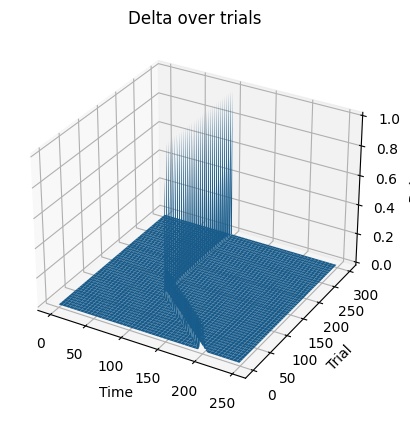

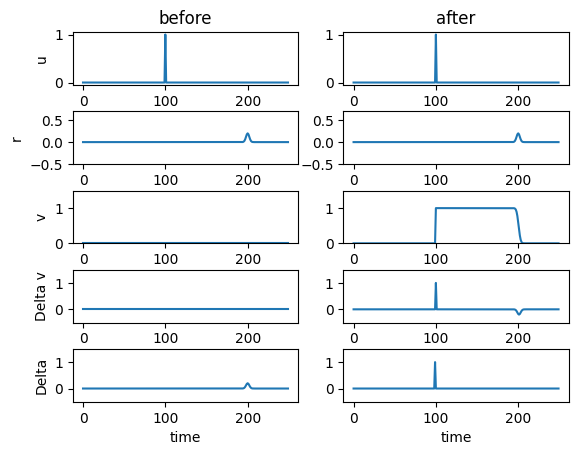

In [22]:
plot_results(time_axis,no_trials,deltas,vs,u,r,w)

Result for epsilon = 0.01


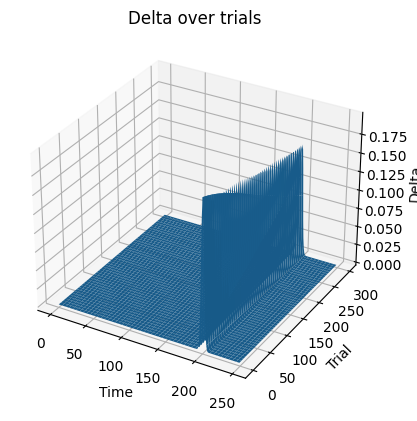

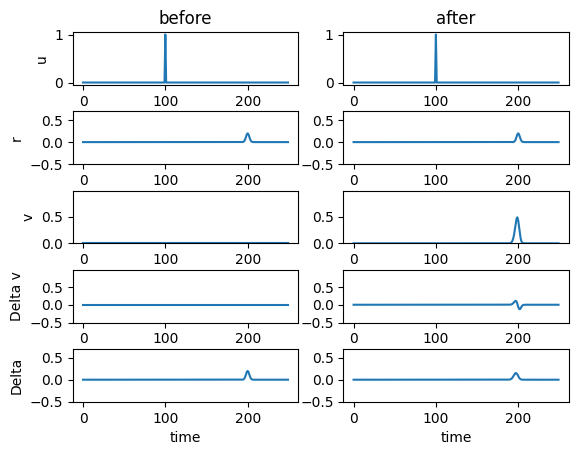

Result for epsilon = 0.1


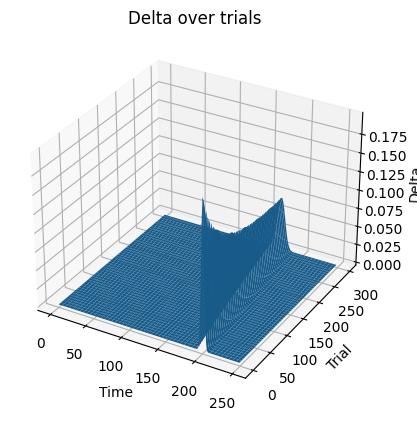

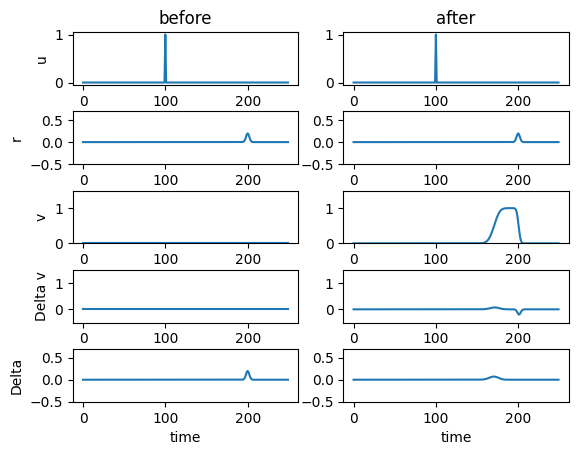

Result for epsilon = 1


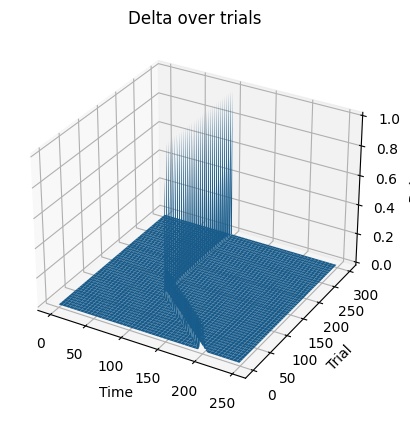

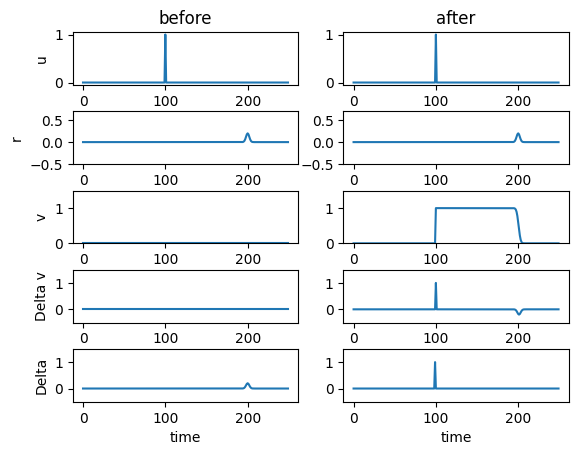

In [23]:
epsilons = [0.01,0.1,1]
u_time = 100
r_time = 200
no_trials = 300
r_std = 2
r_scale = 1
for i,epsilon in enumerate(epsilons):
  u,r,w,vs,deltas = run_trials(time_axis,u_time,r_time,r_std,r_scale,no_trials,epsilon)
  print('Result for epsilon = '+str(epsilon))
  plot_results(time_axis,no_trials,deltas,vs,u,r,w)

Result for reward time = 140


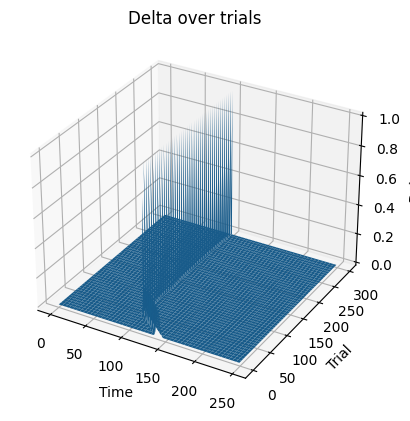

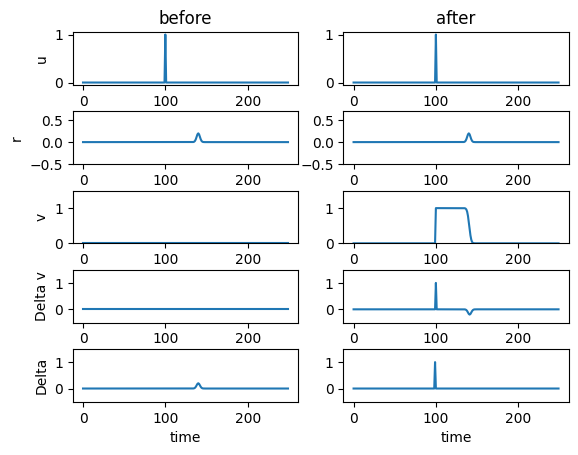

Result for reward time = 170


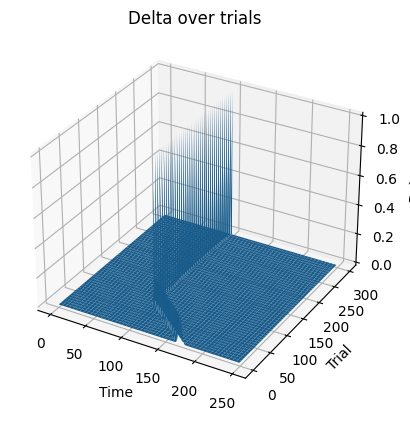

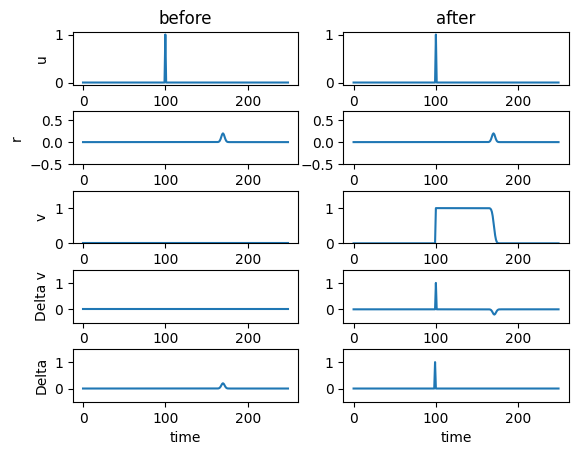

Result for reward time = 200


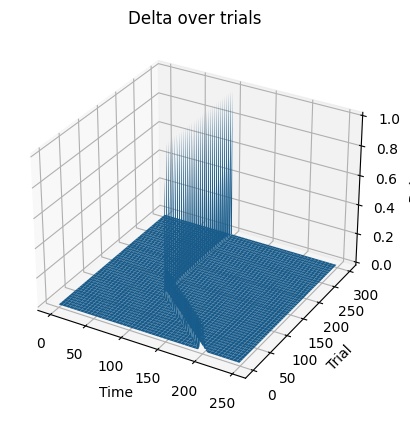

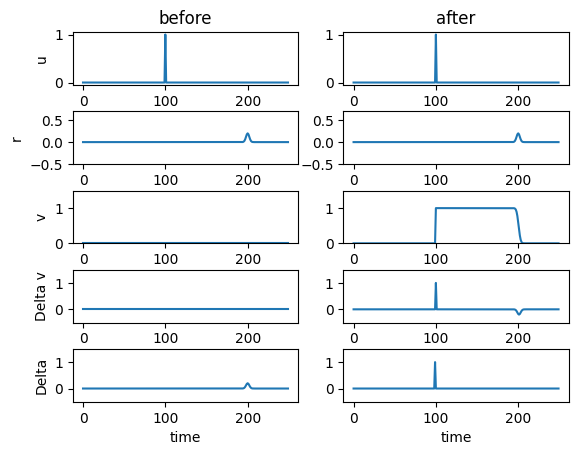

In [24]:
epsilon = 1
u_time = 100
r_times = [140,170,200]
no_trials = 300
r_std = 2
r_scale = 1
for i,r_time in enumerate(r_times):
  u,r,w,vs,deltas = run_trials(time_axis,u_time,r_time,r_std,r_scale,no_trials,epsilon)
  print('Result for reward time = '+str(r_time))
  plot_results(time_axis,no_trials,deltas,vs,u,r,w)

In [28]:
def run_two_reward_trials(time_axis,u_time,r_time1,r_time2,r_std,no_trials,epsilon):
  u,r1,w = initialize(time_axis,u_time,r_time1,r_std)
  u,r2,w = initialize(time_axis,u_time,r_time2,r_std)
  r = r1+r2
  deltas=[]
  vs = []
  for trial in np.arange(0,no_trials):
    delta = np.zeros(len(time_axis))
    v = np.zeros(len(time_axis))
    for i,t in enumerate(time_axis):
      for j,tau in enumerate(np.arange(0,t)):
        v[i]+=w[j]*u[i-j]
    for i,t in enumerate(time_axis[0:len(time_axis)-1]):
      delta[i] = r[i]+v[i+1]-v[i]
      for j,tau in enumerate(np.arange(0,t)):
        w[j]+=epsilon*delta[i]*u[i-j]
    vs.append(v)
    deltas.append(delta)
  return u,r,w,np.array(vs),np.array(deltas)

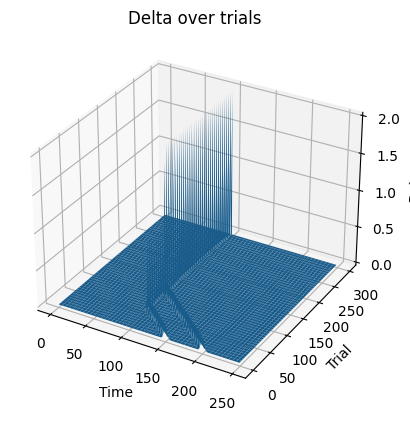

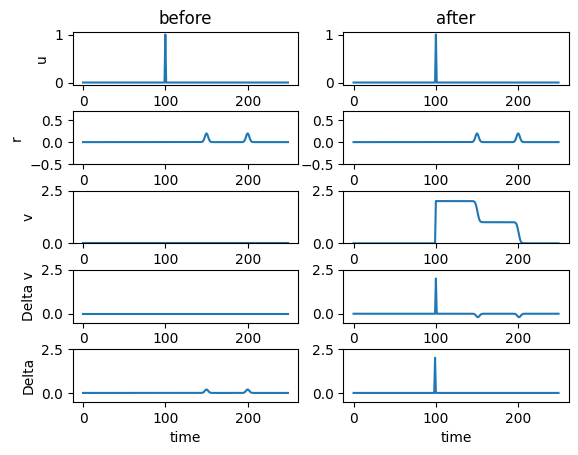

In [29]:
time_axis = np.arange(0,250,1)

epsilon = 1
u_time = 100
r_time1 = 150
r_time2 = 200
no_trials = 300
r_std = 2

u,r,w,vs,deltas = run_two_reward_trials(time_axis,u_time,r_time1,r_time2,r_std,no_trials,epsilon)
plot_results(time_axis,no_trials,deltas,vs,u,r,w)

In [30]:
def run_random_reward_trials(time_axis,u_time,r_time,r_std,no_trials,epsilon):
  deltas=[]
  vs = []
  u,r_init,w = initialize(time_axis,u_time,r_time,r_std)
  for trial in np.arange(0,no_trials):
    r = np.roll(r_init,np.random.randint(-5,5))
    delta = np.zeros(len(time_axis))
    v = np.zeros(len(time_axis))
    for i,t in enumerate(time_axis):
      for j,tau in enumerate(np.arange(0,t)):
        v[i]+=w[j]*u[i-j]
    for i,t in enumerate(time_axis[0:len(time_axis)-1]):
      delta[i] = r[i]+v[i+1]-v[i]
      for j,tau in enumerate(np.arange(0,t)):
        w[j]+=epsilon*delta[i]*u[i-j]
    vs.append(v)
    deltas.append(delta)
  return u,r,w,np.array(vs),np.array(deltas)

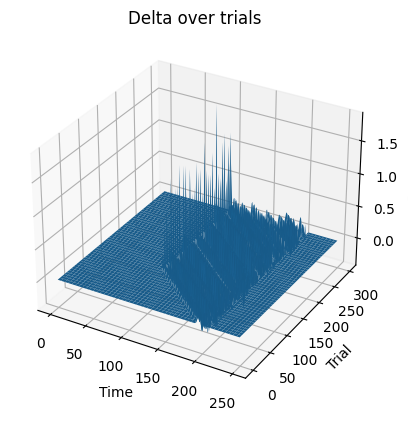

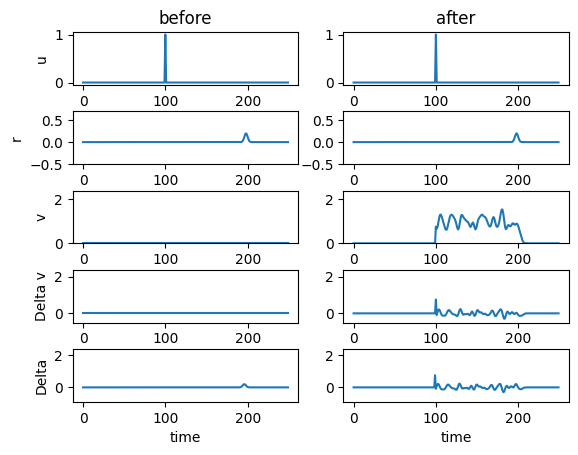

In [31]:
time_axis = np.arange(0,250,1)

epsilon = 1
u_time = 100
r_time = 200
no_trials = 300
r_width = 10
r_mean = 5
r_std = 2


u,r,w,vs,deltas = run_random_reward_trials(time_axis,u_time,r_time,r_std,no_trials,epsilon)
plot_results(time_axis,no_trials,deltas,vs,u,r,w)